In [1]:
#Yan Huang
#20181202
import pandas as pd

In [9]:
stmt = pd.read_csv('stmt.csv')

In [19]:
gdp = pd.read_csv('gdp.csv')
eth = pd.read_csv('eth.csv')
his = pd.read_csv('his.csv')
ob = pd.read_csv('ob.csv')
st = pd.read_csv('st.csv')

In [14]:
data = pd.merge(stmt, st, on='ab', how='outer')

In [16]:
data = pd.merge(data, gdp, on='state', how='left')

In [18]:
data = pd.merge(data, eth, on='state', how='left')

In [21]:
data = pd.merge(data, his, on='state', how='left')

In [23]:
data = pd.merge(data, ob, on='state', how='left')

In [24]:
data.to_csv('modeling.csv', index=False)

In [48]:
data

,mc,pe,tb,ab,avg,state,gdp,asian,black,native,population,white,latino,ob,population_n
0,0.043142,0.195799,-0.003811,AK,0.078376,Alaska,63971.0,0.059,0.034,0.138,733375,0.660,0.069,0.273,0.010992
1,0.076803,0.108295,0.106004,AL,0.097034,Alabama,37261.0,0.012,0.264,0.005,4830620,0.688,0.041,0.301,0.072401
2,0.030883,0.090911,0.091901,AR,0.071232,Arkansas,36368.0,0.014,0.155,0.006,2958208,0.780,0.072,0.281,0.044337
3,0.061041,0.123230,0.075878,AZ,0.086716,Arizona,38590.0,0.030,0.042,0.044,6641928,0.784,0.309,0.233,0.099549
4,0.059854,0.090813,0.098648,CA,0.083105,California,58619.0,0.137,0.059,0.007,38421464,0.618,0.389,0.231,0.575858
5,0.005662,0.106283,0.074093,CO,0.062013,Colorado,52795.0,0.029,0.040,0.009,5278906,0.842,0.213,0.210,0.079120
6,0.118771,0.096699,0.126647,CT,0.114039,Connecticut,64511.0,0.042,0.103,0.002,3593222,0.773,0.157,0.208,0.053855
7,0.208333,NaN,0.125000,DC,0.166667,District of Columbia,160472.0,0.037,0.489,0.003,647484,0.402,0.110,0.221,0.009704
8,0.075692,0.020606,0.049691,DE,0.048663,Delaware,63664.0,0.036,0.216,0.003,926454,0.694,0.092,0.259,0.013886
9,0.056176,0.119082,0.082754,FL,0.086004,Florida,39543.0,0.026,0.161,0.003,19645772,0.760,0.249,0.233,0.294450


In [70]:
#regression
import numpy as np
from sklearn import datasets, linear_model, preprocessing
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
import statsmodels.api as sm
from scipy import stats

In [40]:
arr = np.array(data['population'])

In [41]:
n = preprocessing.normalize([arr])

In [47]:
data['population_n'] = n[0]

In [49]:
arr = np.array(data['gdp'])
n = preprocessing.normalize([arr])
data['gdp_n'] = n[0]

In [50]:
X=data[['gdp_n','population_n','ob','white','black','native','asian','latino']].values
Y=data['avg'].values

In [65]:
lr = linear_model.LinearRegression(fit_intercept=True).fit(X,Y)
predict_lr = lr.predict(X)

In [66]:
print(lr.coef_)
print(lr.intercept_)

[ 0.18466999 -0.10175707 -0.13599504  0.6829645   0.62760681  0.93111317
  1.09754768  0.09661049]
-0.5519434217111325


In [58]:
mse = 0
for i in range(len(predict_lr)):
    mse += (predict_lr[i]-data.loc[i,'avg'])**2

In [67]:
predict_lr

array([0.11267162, 0.07507876, 0.08076841, 0.09040162, 0.03987717,
       0.09785424, 0.10110196, 0.1298828 , 0.10285643, 0.08096028,
       0.07332902, 0.05419939, 0.10503433, 0.09753955, 0.07679551,
       0.08457506, 0.0966936 , 0.08880087, 0.08140525, 0.10794423,
       0.08810509, 0.10749373, 0.08263258, 0.1082628 , 0.08611161,
       0.06863321, 0.12000302, 0.0746582 , 0.12376848, 0.10654195,
       0.11860112, 0.10201731, 0.09319401, 0.07907749, 0.06622276,
       0.08228257, 0.0687003 , 0.0923842 , 0.08719334, 0.08917122,
       0.07394979, 0.12184291, 0.0817329 , 0.07128659, 0.0884084 ,
       0.09523018, 0.11472707, 0.09402631, 0.10000948, 0.09209132,
       0.11093843])

In [59]:
mse

0.078857601507664

In [64]:
corr = data[['avg','mc','pe','tb','gdp','population','ob','white','black','native','asian','latino']].corr()
corr.style.background_gradient()

,avg,mc,pe,tb,gdp,population,ob,white,black,native,asian,latino
avg,1,0.400422,0.845688,0.100626,0.151663,-0.254294,-0.123468,0.194615,-0.101045,0.121895,-0.165897,-0.139644
mc,0.400422,1,-0.174521,0.00614452,0.258023,-0.17841,0.0612815,-0.0129967,0.0796385,0.0876669,-0.133395,0.134918
pe,0.845688,-0.174521,1,-0.202198,-0.137229,-0.203088,-0.192474,0.301653,-0.249616,0.122969,-0.1281,-0.254602
tb,0.100626,0.00614452,-0.202198,1,0.165399,0.117473,0.0619357,-0.155636,0.149414,-0.121288,0.0890901,0.107584
gdp,0.151663,0.258023,-0.137229,0.165399,1,-0.000881988,-0.343888,-0.395589,0.357692,-0.016722,0.145349,0.0665699
population,-0.254294,-0.17841,-0.203088,0.117473,-0.000881988,1,-0.00995541,-0.204704,0.117834,-0.243661,0.195688,0.524786
ob,-0.123468,0.0612815,-0.192474,0.0619357,-0.343888,-0.00995541,1,-0.0136946,0.411813,-0.00512362,-0.360154,-0.374158
white,0.194615,-0.0129967,0.301653,-0.155636,-0.395589,-0.204704,-0.0136946,1,-0.626263,0.0422197,-0.658032,-0.220333
black,-0.101045,0.0796385,-0.249616,0.149414,0.357692,0.117834,0.411813,-0.626263,1,-0.322237,-0.0864511,-0.118447
native,0.121895,0.0876669,0.122969,-0.121288,-0.016722,-0.243661,-0.00512362,0.0422197,-0.322237,1,-0.105985,0.134055


In [95]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0000001)
las = lasso.fit(X,Y)

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [96]:
predict_las = las.predict(X)

In [97]:
predict_las

array([0.11263668, 0.07510329, 0.08081682, 0.09037346, 0.03993403,
       0.09788103, 0.10113395, 0.12990866, 0.10280594, 0.08087702,
       0.07332166, 0.05420516, 0.10500912, 0.09755136, 0.07683326,
       0.08463074, 0.09669406, 0.08882622, 0.08137726, 0.10790541,
       0.08804781, 0.10748421, 0.0826455 , 0.10818822, 0.08615279,
       0.06860657, 0.11994099, 0.07470541, 0.12370305, 0.10650002,
       0.11852521, 0.10185518, 0.09317353, 0.07910399, 0.06631229,
       0.08233501, 0.06892209, 0.09243463, 0.0872024 , 0.0892811 ,
       0.07398117, 0.12174321, 0.08176129, 0.07119256, 0.08853829,
       0.09513176, 0.11470781, 0.09401709, 0.09998292, 0.09210529,
       0.11096195])

In [102]:
def las(alphas):
    for a in alphas:
        lasso = Lasso(alpha=a)
        las = lasso.fit(X,Y)
        predict_las = las.predict(X)
        mse = 0
        for i in range(len(predict_las)):
            mse += (predict_las[i]-data.loc[i,'avg'])**2
        print(a,':', mse)

In [106]:
#las([0.1,0.01,0.001,0.0001,0.00001,1e-6,1e-7,1e-8,1e-9,1e-10])

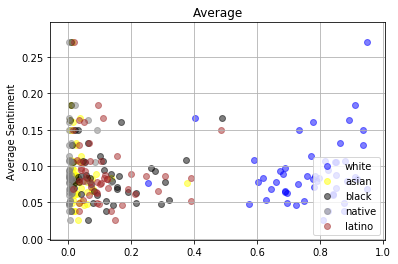

In [115]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(data.white, data.avg, color='blue', label="white",alpha=0.5)
plt.scatter(data.asian, data.avg, color='yellow', label='asian',alpha=0.5)
plt.scatter(data.black, data.avg, color='black', label='black',alpha=0.5)
plt.scatter(data.native, data.avg, color='grey', label='native',alpha=0.5)
plt.scatter(data.latino, data.avg, color='brown', label='latino',alpha=0.5)


plt.legend(loc="lower right")
plt.title("Average")
#plt.xlabel("Advertising [1000 $]")
plt.ylabel("Average Sentiment")
plt.grid()
plt.show()

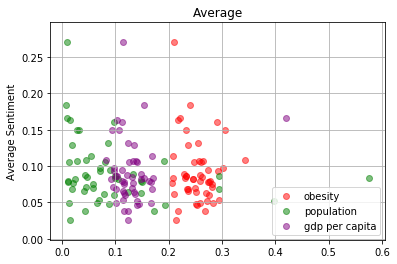

In [116]:
%matplotlib inline

import matplotlib.pyplot as plt


plt.scatter(data.ob, data.avg, color='red', label='obesity',alpha=0.5)
plt.scatter(data.population_n, data.avg, color='green', label='population',alpha=0.5)
plt.scatter(data.gdp_n, data.avg, color='purple', label='gdp per capita',alpha=0.5)

plt.legend(loc="lower right")
plt.title("Average")
#plt.xlabel("Advertising [1000 $]")
plt.ylabel("Average Sentiment")
plt.grid()
plt.show()